In [16]:
import simpleaudio as sa
import os
import tensorflow as tf 
import tensorflow_io as tfio
from scipy.fft import fft, ifft
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
import librosa  
import librosa.display

In [1]:


# Load the WAV file using the correct path
wave_obj = sa.WaveObject.from_wave_file(r"C:\Users\MAY02\Desktop\Audio_classification\Acoustic_guitar\fc55d588.wav")

# Play the WAV file
play_obj = wave_obj.play()

# Wait for the playback to finish
play_obj.wait_done()


In [9]:
wave_obj?

Type:        WaveObject
String form: Wave Object: 1 channel, 16 bit, 44100 Hz
File:        c:\users\may02\anaconda3\envs\python3_10\lib\site-packages\simpleaudio\shiny.py
Docstring:   <no docstring>

In [5]:

print(os.getcwd())


C:\Users\MAY02\Desktop\Audio_classification


In [6]:
file_path = r"C:\Users\MAY02\Desktop\Audio_classification\Acoustic_guitar\fc55d588.wav"
audio_binary = tf.io.read_file(file_path)


In [48]:
audio, sample_rate = tf.audio.decode_wav(audio_binary)


In [27]:
len(audio.shape)

2

In [51]:
audio = np.mean(audio,axis = 1)

In [54]:
audio.shape

(184338,)

In [47]:
audio

array([ 7.0190430e-04,  5.4931641e-04,  4.2724609e-04, ...,
       -6.1035156e-05, -6.1035156e-05, -3.0517578e-05], dtype=float32)

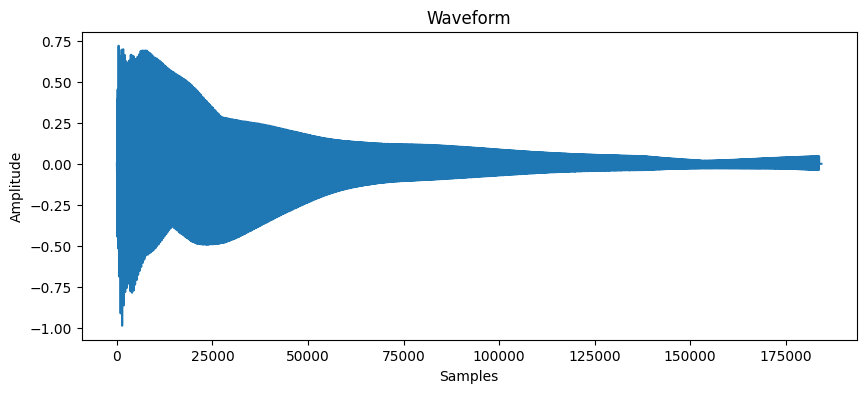

In [55]:




# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(audio)
plt.title('Waveform')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()


In [34]:
# Compute the FFT
fft_result = fft.fft(audio)
fft_magnitude = np.abs(fft_result)
fft_freq = fft.fftfreq(len(fft_result), 1 / sample_rate)



In [35]:
fft_result

array([-4.195984 -0.j        ,  1.3654071+0.03327835j,
        1.3588932+0.04344954j, ...,  1.360304 -0.06781512j,
        1.3588932-0.04344954j,  1.3654071-0.03327835j], dtype=complex64)

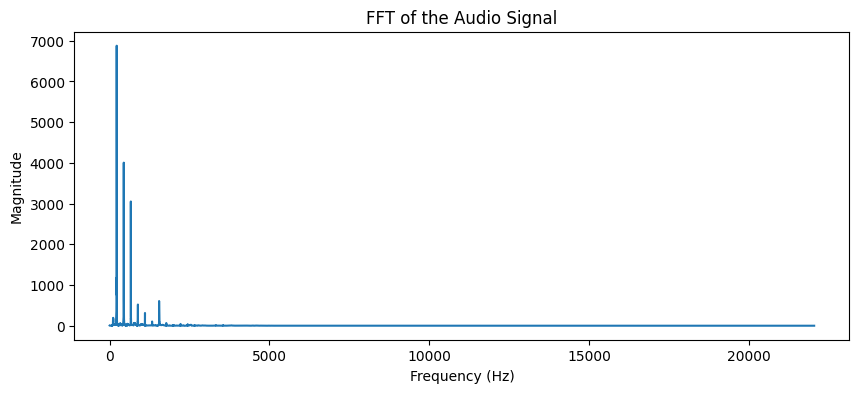

In [36]:
# Plot the magnitude spectrum
plt.figure(figsize=(10, 4))
plt.plot(fft_freq[:len(fft_freq)//2], fft_magnitude[:len(fft_magnitude)//2])
plt.title('FFT of the Audio Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()


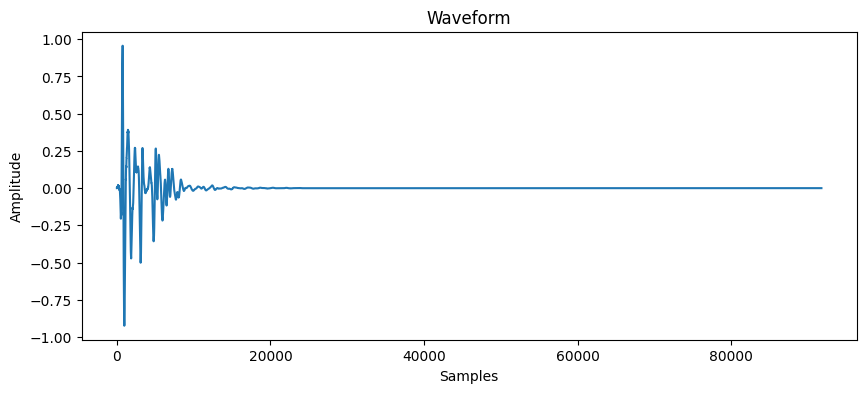

In [7]:
file_path = r"C:\Users\MAY02\Desktop\Audio_classification\Bass_drum\0ddb4bdf.wav"
audio_binary = tf.io.read_file(file_path)
audio, sample_rate = tf.audio.decode_wav(audio_binary)
audio = np.mean(audio,axis = 1)
# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(audio)
plt.title('Waveform')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()


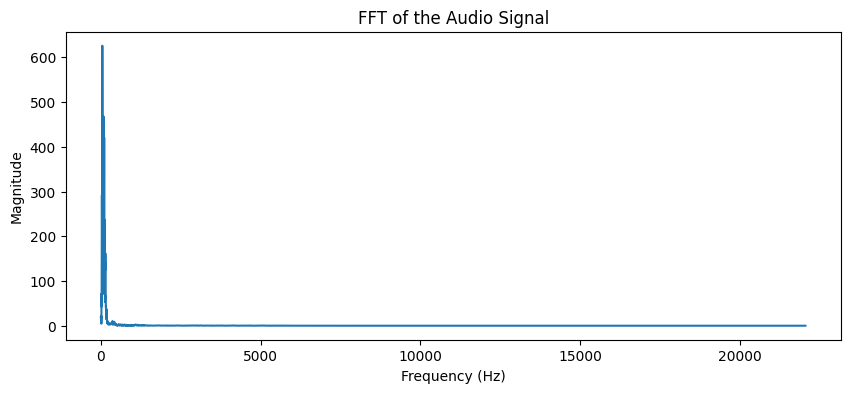

In [8]:
fft_result = fft.fft(audio)
fft_magnitude = np.abs(fft_result)
fft_freq = fft.fftfreq(len(fft_result), 1 / sample_rate)
# Plot the magnitude spectrum
plt.figure(figsize=(10, 4))
plt.plot(fft_freq[:len(fft_freq)//2], fft_magnitude[:len(fft_magnitude)//2])
plt.title('FFT of the Audio Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [10]:
x, sr = librosa.load('test_bass_drum.wav')

In [14]:
freqs = np.fft.fftfreq(x.size)

def describe_freq(freqs):
    mean = np.mean(freqs)
    std = np.std(freqs) 
    maxv = np.amax(freqs) 
    minv = np.amin(freqs) 
    median = np.median(freqs)
    skew = scipy.stats.skew(freqs)
    kurt = scipy.stats.kurtosis(freqs)
    q1 = np.quantile(freqs, 0.25)
    q3 = np.quantile(freqs, 0.75)
    mode = scipy.stats.mode(freqs)[0][0]
    iqr = scipy.stats.iqr(freqs)
    
    return [mean, std, maxv, minv, median, skew, kurt, q1, q3, mode, iqr]

In [ ]:
def rmse(x):
    return np.sum(x**2)

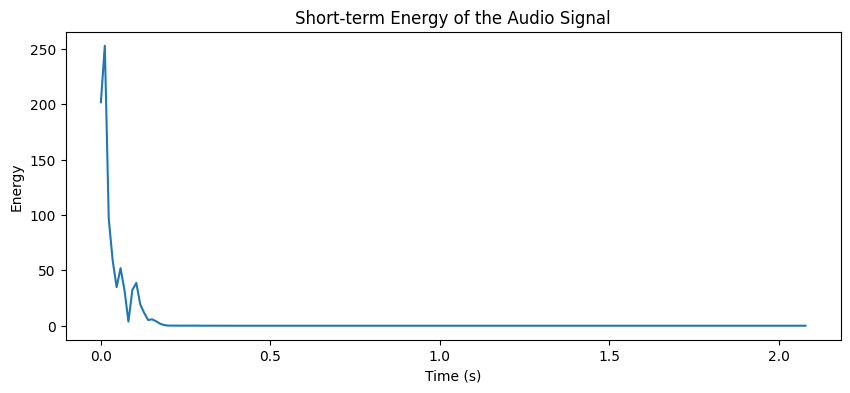

In [15]:
frame_length = 1024  # Number of samples per frame (window)
hop_length = 512     # Hop size for overlapping windows

# Compute short-term energy
energy = np.array([
    np.sum(np.abs(audio[i:i+frame_length]**2))
    for i in range(0, len(audio), hop_length)
])

# Create a time axis for the energy plot
time_axis = librosa.frames_to_time(np.arange(len(energy)), sr=sample_rate, hop_length=hop_length)

# Plot the energy
plt.figure(figsize=(10, 4))
plt.plot(time_axis, energy)
plt.title('Short-term Energy of the Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.show()


In [18]:

# Compute the Short-Time Fourier Transform (STFT)
stft = librosa.stft(audio, n_fft=2048, hop_length=512)

# Convert the amplitude to dB (log scale)
spectrogram = librosa.amplitude_to_db(np.abs(stft))

# Plot the log spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()


TypeError: Cannot convert 1.0 to EagerTensor of dtype int32

<Figure size 1000x600 with 0 Axes>

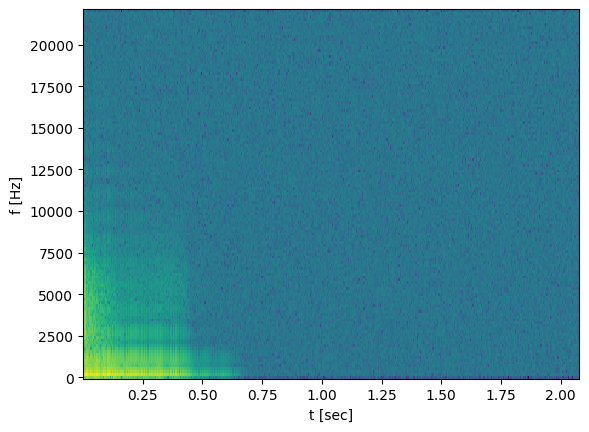

In [22]:
from scipy.io import wavfile
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

sf, audio = wavfile.read('test_bass_drum.wav')
# sig = np.mean(audio, axis=1)
f, t, Sxx = signal.spectrogram(audio, sf, scaling='spectrum')

plt.pcolormesh(t, f, np.log10(Sxx))
plt.ylabel('f [Hz]')
plt.xlabel('t [sec]')
plt.show()

array([ 2,  0,  1, ..., -1,  1,  0], dtype=int16)